In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [4]:
df = pd.read_csv('life_expectancy.csv')

In [5]:
# rename the columns
df.columns = ['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']

In [6]:
df.columns.to_list()

['Country',
 'Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness 1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
y = df['Life expectancy']
df_numerical = df.drop(['Country', 'Status'], axis=1)

In [10]:
correlations = df_numerical.corr()['Life expectancy'].drop('Life expectancy')

# Filter columns with high correlation
high_corr = correlations[correlations.abs() > 0.5]

# Define the feature set X
X = df_numerical[high_corr.index]

high_corr

Adult Mortality                   -0.696359
BMI                                0.567694
HIV/AIDS                          -0.556556
Income composition of resources    0.724776
Schooling                          0.751975
Name: Life expectancy, dtype: float64

In [7]:
high_corr = pd.DataFrame(high_corr)

In [8]:
high_corr

,Life expectancy
Adult Mortality,-0.696359
BMI,0.567694
HIV/AIDS,-0.556556
Income composition of resources,0.724776
Schooling,0.751975


In [9]:
# Plot the distribution of the status
data = df['Status']
fig = px.histogram(data, x='Status', title='Distribution of Status')
fig.show();

Text(0.5, 1.0, 'Correlation w.r.t Life expectancy')

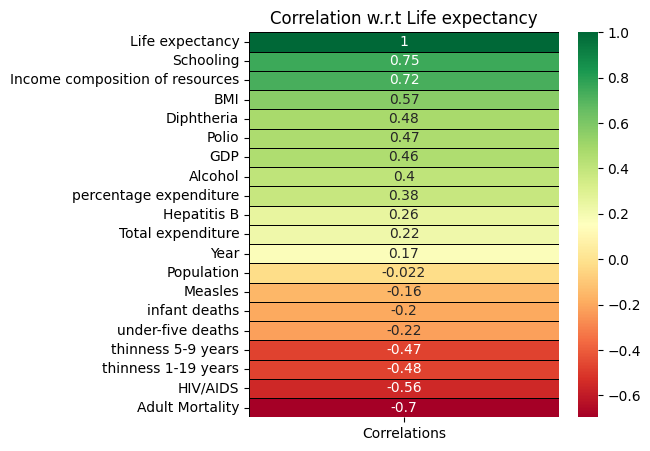

In [11]:
import seaborn as sns
# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlations with 'Life expectancy'
corr = numerical_df.corrwith(numerical_df['Life expectancy']).sort_values(ascending = False).to_frame()

# Rename the column
corr.columns = ['Correlations']

# Plot the heatmap
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.4, linecolor='black')
plt.title('Correlation w.r.t Life expectancy');

In [12]:
# Define the columns of interest
columns = ['Adult Mortality', 'BMI', 'HIV/AIDS', 'Income composition of resources', 'Schooling']

# Compute and print the statistics for each column
for column in columns:
    print(f"Statistics for {column}:")

    # Central tendency
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]
    print(f"Mean: {mean}, Median: {median}, Mode: {mode}")

    # Dispersion
    std_dev = df[column].std()
    var = df[column].var()
    range_val = df[column].max() - df[column].min()
    print(f"Standard Deviation: {std_dev}, Variance: {var}, Range: {range_val}")

    # Position (using percentiles as an example)
    percentiles = df[column].quantile([0.25, 0.5, 0.75])
    print(f"25th percentile: {percentiles[0.25]}, Median: {percentiles[0.5]}, 75th percentile: {percentiles[0.75]}")

    # Outliers (using the IQR method as an example)
    IQR = percentiles[0.75] - percentiles[0.25]
    lower_bound = percentiles[0.25] - 1.5 * IQR
    upper_bound = percentiles[0.75] + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"Number of Outliers: {outliers.count()}")

    # Five-number summary
    min_val = df[column].min()
    max_val = df[column].max()
    print(f"Min: {min_val}, 25th percentile: {percentiles[0.25]}, Median: {percentiles[0.5]}, 75th percentile: {percentiles[0.75]}, Max: {max_val}")

    print("\n")

Statistics for Adult Mortality:
Mean: 164.79644808743168, Median: 144.0, Mode: 12.0
Standard Deviation: 124.29207900342186, Variance: 15448.520902992863, Range: 722.0
25th percentile: 74.0, Median: 144.0, 75th percentile: 228.0
Number of Outliers: 82
Min: 1.0, 25th percentile: 74.0, Median: 144.0, 75th percentile: 228.0, Max: 723.0


Statistics for BMI:
Mean: 38.321246556473824, Median: 43.5, Mode: 58.5
Standard Deviation: 20.04403350256208, Variance: 401.76327905183103, Range: 86.3
25th percentile: 19.3, Median: 43.5, 75th percentile: 56.2
Number of Outliers: 0
Min: 1.0, 25th percentile: 19.3, Median: 43.5, 75th percentile: 56.2, Max: 87.3


Statistics for HIV/AIDS:
Mean: 1.7421034717494894, Median: 0.1, Mode: 0.1
Standard Deviation: 5.077784531086549, Variance: 25.783895744141844, Range: 50.5
25th percentile: 0.1, Median: 0.1, 75th percentile: 0.8
Number of Outliers: 542
Min: 0.1, 25th percentile: 0.1, Median: 0.1, 75th percentile: 0.8, Max: 50.6


Statistics for Income composition o

### Remark: % of outliers is 

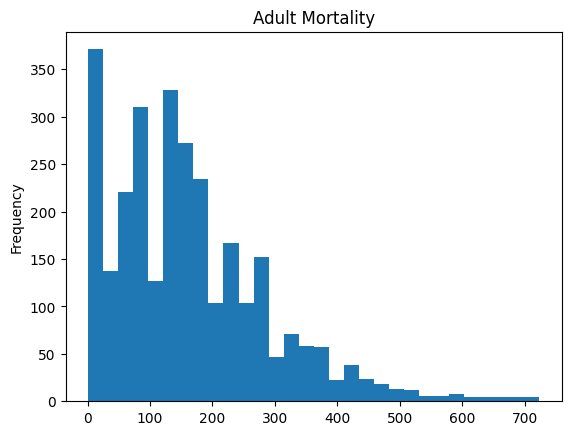

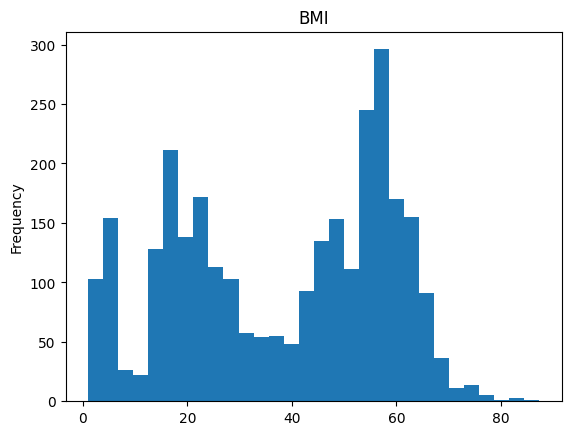

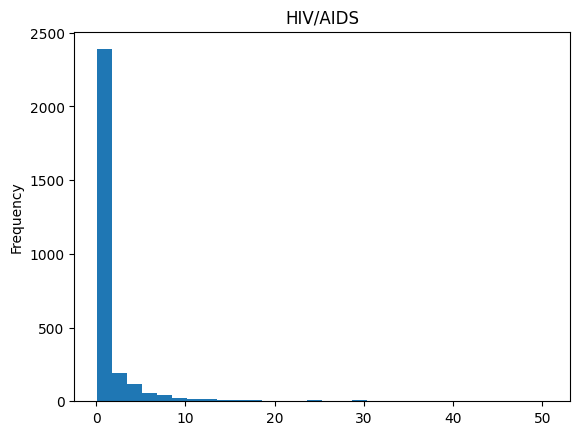

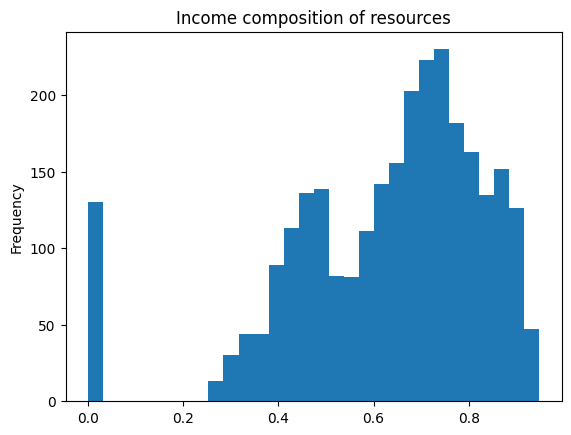

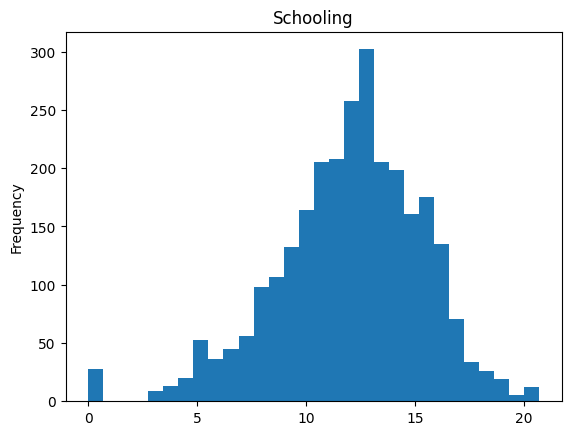

In [14]:
# histogram for column in columns
for column in columns:
    subplot = df[column].plot(kind='hist', bins=30, title=column)
    plt.show();

In [13]:
for column in columns:
    df[f'{column}_log'] = np.log(df[column])
    

c:\Users\nhatk\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

c:\Users\nhatk\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log



In [14]:
for column in columns:
    fig = px.histogram(df[f'{column}_log'], x=f'{column}_log', title=f'{column} Distribution')
    fig.show()

In [15]:
columns = ['Adult Mortality', ' BMI ', ' HIV/AIDS', 'Income composition of resources', 'Schooling']

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # only keep rows in the dataframe that do not fall in the outlier thresholds
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [16]:
for col in columns:
    fig = px.histogram(df, x=col, title=f'{col} Distribution')
    fig.show()